In [36]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
<a href="javascript:code_toggle_err()"><button>here</button></a>''')

In [37]:
import os
import sys
import pandas as pd
import csv
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [38]:
from sklearn.linear_model import Ridge,LogisticRegression
# stack_clf = LogisticRegression(n_jobs=-1)
ridge_clf = Ridge(alpha=1.0)

In [39]:
from xgboost import XGBRegressor,plot_importance
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import Normalizer
import xgboost as xgb

In [40]:
from matplotlib import pyplot
%matplotlib inline

In [41]:
from mlxtend.regressor import StackingRegressor

In [45]:
data_folder = '../data'
data_files = os.listdir(data_folder)

In [48]:
year_new = pd.read_csv("../merged_data.csv")
year_new.head()

,Hour,GHI,Temperature,Pressure,Relative Humidity,Wind Speed
0,0,0,12.751340,957.930542,58.411399,4.430836
1,1,0,12.196895,957.762268,67.295928,4.453419
2,2,0,11.806139,957.878052,72.567490,4.335502
3,3,0,11.510596,957.623596,75.299340,4.233897
4,4,0,11.306807,957.932861,76.799288,4.197238


In [44]:
new_columns = year_2014.iloc[1]
year_all = year_2014[2:]
year_all.columns =new_columns
year = year_all.loc[:, year_all.columns.notnull()]

year = year.drop(columns=['Year','Month','Day','Minute','DHI','DNI','Clearsky DHI','Clearsky DNI','Fill Flag','Dew Point','Clearsky GHI','Solar Zenith Angle','Wind Direction','Snow Depth','Precipitable Water'])

KeyError: "['Year' 'Month' 'Day' 'Minute' 'DHI' 'DNI' 'Clearsky DHI' 'Clearsky DNI'\n 'Fill Flag' 'Dew Point' 'Clearsky GHI' 'Solar Zenith Angle'\n 'Wind Direction' 'Snow Depth' 'Precipitable Water'] not found in axis"

In [47]:
year = year.astype('float64')
year.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131398 entries, 2 to 131399
Data columns (total 6 columns):
1.0                   131398 non-null float64
0.0                   131398 non-null float64
12.196895002047142    131398 non-null float64
957.7622680664062     131398 non-null float64
67.29592773800267     131398 non-null float64
4.453418731689453     131398 non-null float64
dtypes: float64(6)
memory usage: 6.0 MB


In [49]:
X = year_new.drop(columns=['GHI'])
Y = year_new.pop('GHI')

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

## Models selections 
As using GridSearchCV gives us the best parameter as n_estimators = 10, max_depth = 3 and learning rate = 0.4
so, we will define forest around these parameter values

## forest Number 1 :: 5 xgboost trees 

In [50]:
xgb_1 = XGBRegressor(learning_rate=0.4,max_depth=6,n_estimators=8)
xgb_2 = XGBRegressor(learning_rate=0.4,max_depth=6,n_estimators=9)
xgb_3 = XGBRegressor(learning_rate=0.4,max_depth=8,n_estimators=10)
xgb_4 = XGBRegressor(learning_rate=0.4,max_depth=10,n_estimators=9)
xgb_5 = XGBRegressor(learning_rate=0.4,max_depth=10,n_estimators=8)

In [90]:
xgb_1.fit(X_train,y_train)
xgb_2.fit(X_train,y_train)
xgb_3.fit(X_train,y_train)
xgb_4.fit(X_train,y_train)
xgb_5.fit(X_train,y_train)

/home/primus/durgeshapi/ensemble/env/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.4, max_delta_step=0, max_depth=10,
       min_child_weight=1, missing=None, n_estimators=8, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [91]:
predicted_xgb_1 = xgb_1.predict(X_train)
predicted_xgb_2 = xgb_2.predict(X_train)
predicted_xgb_3 = xgb_3.predict(X_train)
predicted_xgb_4 = xgb_4.predict(X_train)
predicted_xgb_5 = xgb_5.predict(X_train)

In [92]:
score = {}

In [97]:

predictinos = xgb_5.predict(X_test)
squared_sum = 0
for counter,i in enumerate(y_test):
    squared_sum += ((i)-predictinos[counter])**2
score['xgb_5'] = (math.sqrt(squared_sum/len(y_test)))  

In [98]:
print(score)

{'xgb_1': 67.74048263349637, 'xgb_2': 67.63518378214201, 'xgb_3': 68.24710119588457, 'xgb_4': 69.01120975428724, 'xgb_5': 69.04392289385993}


In [99]:
df_pred = pd.DataFrame({
    'x1':predicted_xgb_1,
    'x2':predicted_xgb_2,
    'x3':predicted_xgb_3,
    'x4':predicted_xgb_4,
    'x5':predicted_xgb_5,
})
X_train, X_test, y_train, y_test = train_test_split(df_pred, y_train, test_size=test_size, random_state=seed)

In [100]:
ridge_clf.fit(X_train,y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [101]:
predictinos = ridge_clf.predict(X_test)
print(predictinos)
squared_sum = 0
for counter,i in enumerate(y_test):
    squared_sum += ((i)-predictinos[counter])**2
print(math.sqrt(squared_sum/len(y_test))) 

[-1.93670132e-01 -1.76236294e-01  8.29439262e+02 ...  5.45874910e+02
  2.13097525e+01  3.72398717e+01]
56.68561861744919


In [110]:
min_x_test = y_test[0:100]
predictinos = ridge_clf.predict(X_test)[0:100]

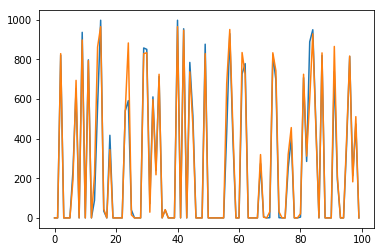

In [115]:
original_y_test = []
for i in min_x_test:
    original_y_test.append(i)
plt.plot(original_y_test)
plt.plot(predictinos)
plt.show()

# forest Number 2 :: 7 xgboost trees 